# Introduction

In Wave Forms, we looked at what waves are, how to visualize them, and how to deal with null data. In this article, I aim to develop an intuition on what the Fourier Transformation is, why it is useful when studying audio, show mathematical proofs to make it computationally efficient, and visualize the results.

With this in mind, let's begin. We will first initialize our necessary variables and packages below:

In [1]:
# Import necessary packages
%matplotlib inline
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load necessary variables
rb, sr = librosa.load('snippets/rb.wav')
rap, _ = librosa.load('snippets/rap.wav')
rock, _ = librosa.load('snippets/rock.wav')

## Recall from Wave Forms:

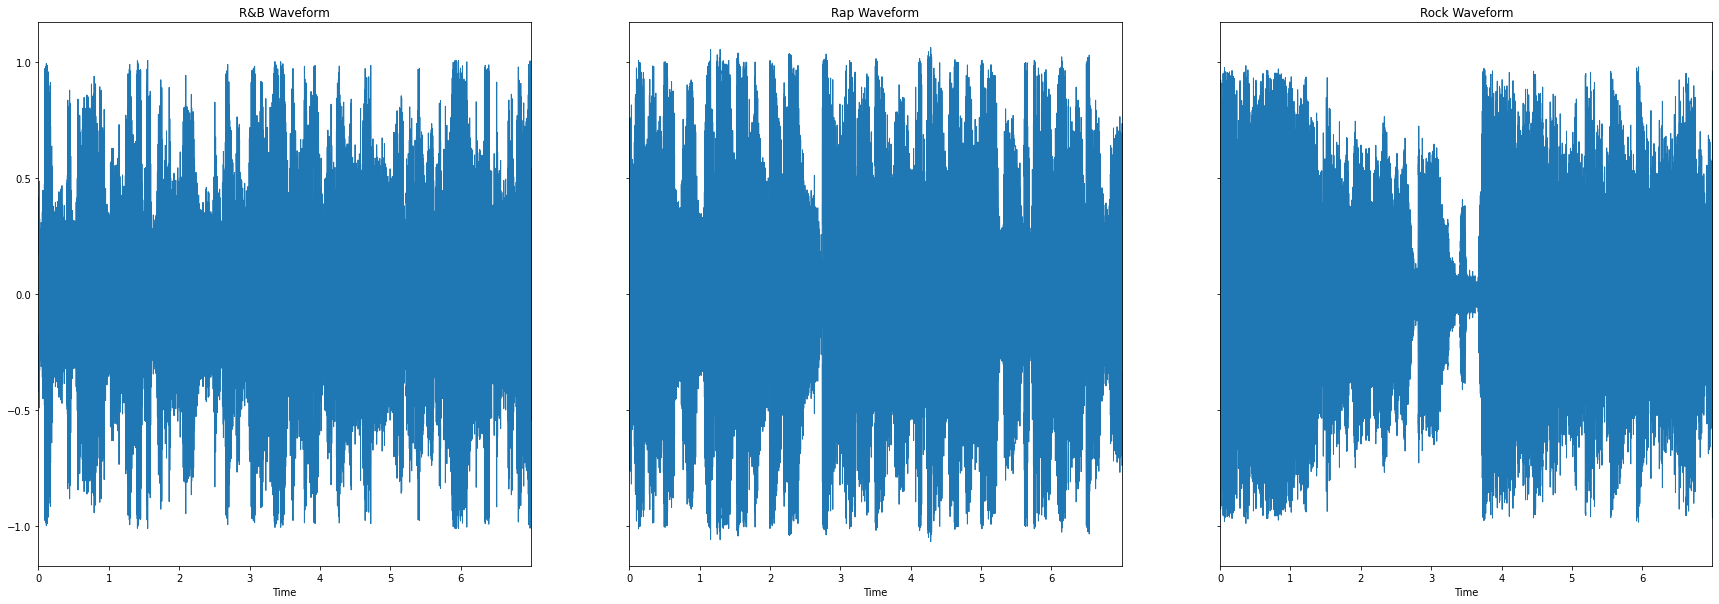

In [3]:
#Visualizing waveforms
fig, ax = plt.subplots(1,3, figsize = (30,10), sharey = True)
librosa.display.waveplot(rb, sr=sr, ax=ax[0])
ax[0].set(title = 'R&B Waveform')
librosa.display.waveplot(rap, sr=sr, ax=ax[1])
ax[1].set(title = 'Rap Waveform')
librosa.display.waveplot(rock, sr=sr, ax=ax[2])
ax[2].set(title = 'Rock Waveform')
plt.show()

# Fourier Transformation:


## What is the Fourier Transformation and Why is it Important?


When looking at the figure above, we can see various spikes of amplitudes creating a unique shape to each sound. This is because all complex sounds - like these recorded instruments - are really just a sum of many sine and cosine signals. The `gif` below presents a nice visualization of the objective:

![](images/fft.gif)

It is important to note that by using this transformation, we will be translating the audio from the time-domain to the frequency-domain. Here are some key points about the two:

* The time domain looks at the variation of the signal's amplitude over time. This is useful for understanding its physical shape. In order to plot this, we need time on the x-axis and amplitude on the y-axis. The shape gives us a good idea of how loud or quiet the sound will be.

* The frequency domain observes the constituent signals our recording is comprised of. By doing this, we can find a sort of "fingerprint" of the sound. In order to plot this, we need frequency on the x-axis and magnitude on the y-axis. The larger the magnitude, the more important that frequency is. The magnitude is simply the absolute value of our results from the FFT, $\hat{x}$.

The Discrete Fourier Transformation (DFT,) which is what `numpy` builds off of, is as follows:

$$ \hat x_k = \frac{1}{\sqrt{N}} \displaystyle\sum_{n=0}^{N-1} x_n \omega_{N}^{nk}  $$

    where
$$ \omega_{N} = \exp \left(\frac{-2 \pi i}{N} \right) \\ k = 0, 1, \dots, (N - 1$$
    



Equations from [Derek L. Smith from the University of California, Santa Barbara.](https://web.math.ucsb.edu/~dls/Expository/2014-10-FFT.pdf)

From the equation above, we can see that the Fourier Transformation is a sum of products: $x$ - which is real - and $\omega$ - which is imaginary.

When learning about the Fourier Transformation, you may see a continuous version - which utilizes an integral as opposed to a sum - suitably called the Continuous Fourier Transform. The discrete version of the transformation  is generally used for computers' operations. In fact, even in the discrete form, most computers still lack the proper computational power to solve for the transformation as the raw equation below. The DFT has some nice properties that allow for computational ease, known as the Fast Fourier Transformation.



## Fast Fourier Transformation (FFT)

The FFT is as follows:

$$ \hat x_k = \frac{1}{\sqrt{N}} \displaystyle\sum_{n=0}^{m-1} x_{2n} \omega_{m}^{nk} + \frac{\omega_N}{\sqrt{N}} \displaystyle\sum_{n = 0}^{m-1}x_{2n+1} \omega_{m}^{nk}$$

Do not let the notation worry you. In the Discrete Fourier Transformation, you are dealing with a sum of products x, and omega. This equation splits sum of products into two - one along the odd indices and another along the even. This procedure above can be modeled much more efficiently with computer processes as opposed to the DFT.

Now, let's visualize what the FFT looks like. In our application, we will be using the `numpy.fft.fft` function and apply it to our sound waves.

In [4]:
def fft_components(sound):
    # Find FFT
    fft = np.fft.fft(sound)
    # Find magnitude
    mag = np.abs(np.real(fft))
    # Find frequency
    freq = np.linspace(0,sr, len(mag))
    return mag, freq

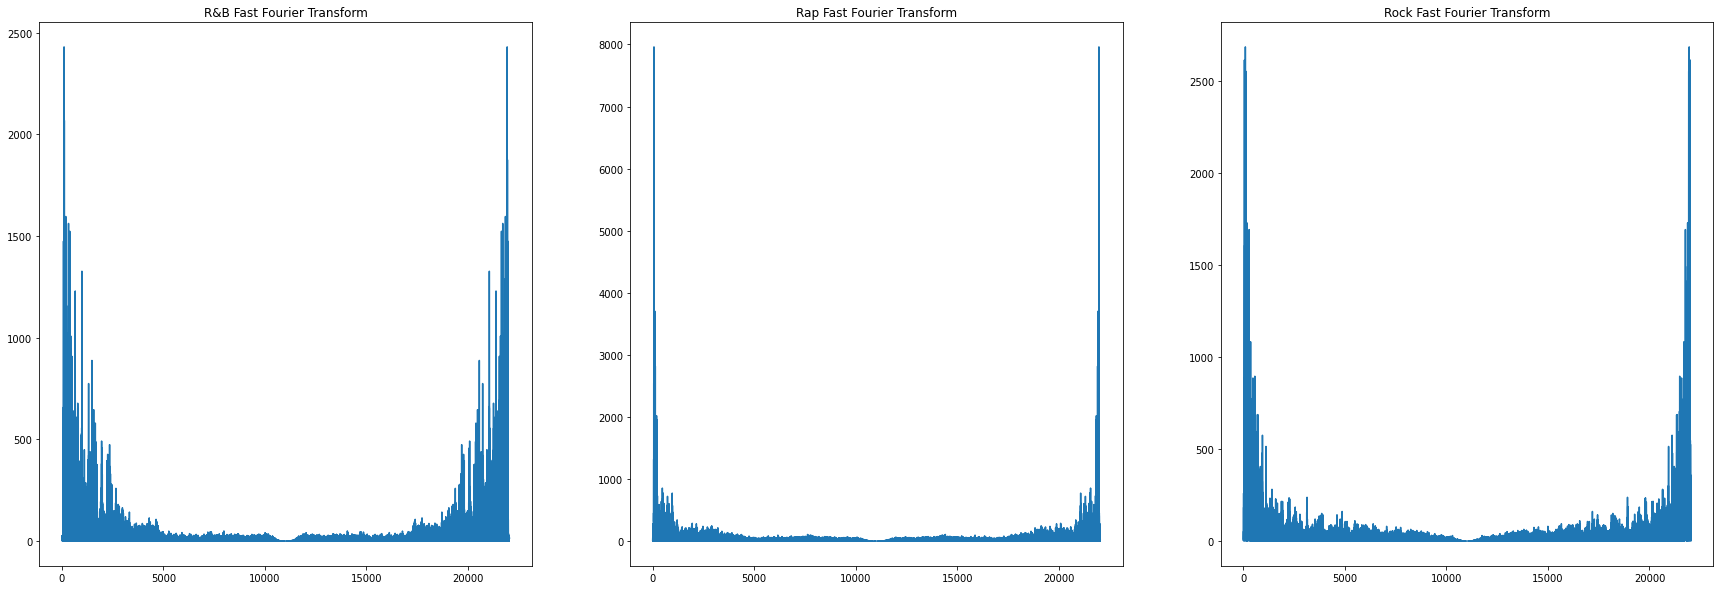

In [5]:
# Using function from above to find components
rb_mag, rb_freq = fft_components(rb)
rap_mag, rap_freq = fft_components(rap)
rock_mag, rock_freq = fft_components(rock)

# Visualize the FFT
fig, ax = plt.subplots(1,3, figsize = (30,10))
# Plotting the guitar
ax[0].plot(rb_freq, rb_mag)
ax[0].set(title = 'R&B Fast Fourier Transform')
# Plotting the kick drum
ax[1].plot(rap_freq, rap_mag)
ax[1].set(title = 'Rap Fast Fourier Transform')
# Plotting the snare
ax[2].plot(rock_freq, rock_mag)
ax[2].set(title = 'Rock Fast Fourier Transform')
plt.show()

Again, there are some slight problems with the visualizations. However, this is a quite easy fix as the DFT has a symmetric property. This makes sense as our visualization on the left half mimics the visualizations on the right half. We will slice the arrays in half and visualize from there.

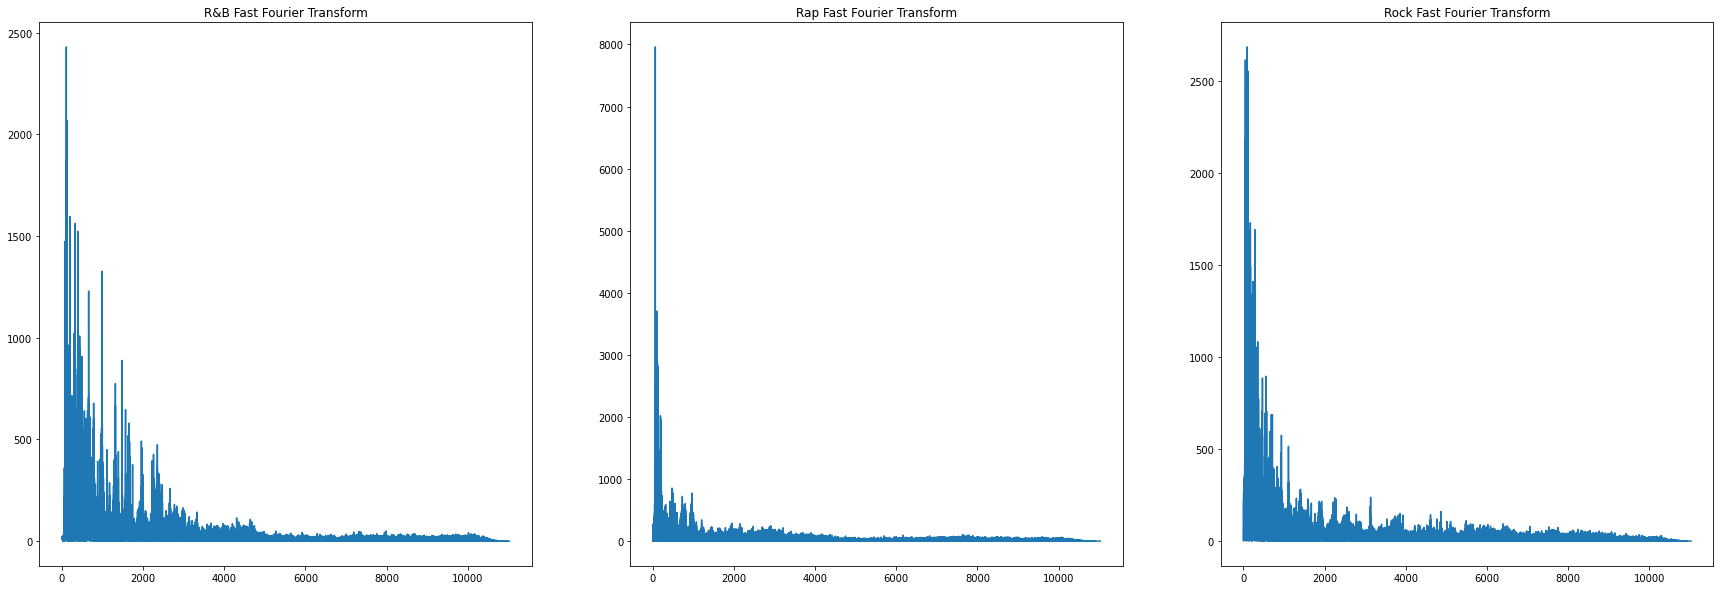

In [6]:
rb_half = int(len(rb_mag) / 2)
rap_half = int(len(rap_mag) / 2)
rock_half = int(len(rock_mag) / 2)

# Visualize the FFT
fig, ax = plt.subplots(1,3, figsize = (30,10))
# Plotting the guitar
ax[0].plot(rb_freq[:rb_half], rb_mag[:rb_half])
ax[0].set(title = 'R&B Fast Fourier Transform')
# Plotting the kick drum
ax[1].plot(rap_freq[:rap_half], rap_mag[:rap_half])
ax[1].set(title = 'Rap Fast Fourier Transform')
# Plotting the snare
ax[2].plot(rock_freq[:rock_half], rock_mag[:rock_half])
ax[2].set(title = 'Rock Fast Fourier Transform')
plt.show()